A1 a) knn, leave one out and leave one out error (ssd)

In [141]:
import numpy as np
def k_nn (x_test, x_train, lrtd_train):
    labels = []
    distances = np.sqrt(np.sum((x_test[:, np.newaxis, :] - x_train)**2, axis=-1))
    '''
    dists = []
    for row in x_test:
        d = np.sqrt(np.sum((row - x_train)**2, axis=-1))
        dists.append(d)
    distances = np.array(dists)
    '''
    
    for dist in distances:
        min_index = np.argmin(dist)
        # picks the index of the closest object and appends the train data angles from this index
        labels.append(lrtd_train[min_index])
    return labels

In [142]:
def ssd (pred, test):
    sum_of_squared_diff = np.sum((pred-test)**2)
    # returns the sums between all predicted faces over the true angles
    return sum_of_squared_diff

In [143]:
def result_compare(old_sum, new_sum):
    if old_sum > new_sum:
        return True
    else:
        return False

In [144]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor


# Read the contents of the file into a np array
data = np.loadtxt("noisy_sculpt_faces.txt")

data.shape


(100, 259)

In [145]:
from sklearn.model_selection import train_test_split

X = data[:,0:256]

angles = data[:,256:259]


# Split the data for the model
# The results may vary since the function splits the data randomly and due to very small sample size (100) it affects the results drastically
x_train, x_test = train_test_split(X, test_size=0.2)
angles_train, angles_test =train_test_split(angles, test_size=0.2)


print(angles.shape,X.shape)

(100, 3) (100, 256)


In [146]:
# prediction as a list of angles
pred = k_nn(x_test, x_train, angles_train)

# sum the squared error over all the faces
ssd(pred, angles_test)

129104.25256746473

A1 b) forward selection

In [147]:
def feature_selection(x_train,x_test,angles_train,angles_test):
    all_SSD = []
    filter_indices = []
    current_model = float('inf')


    is_better = True
    while is_better:
        best_index = 0
        current_ssd = float('inf')
        is_better = False
        for i in range(X.shape[1]):
            if i not in filter_indices:

                if not filter_indices:
                    new_indices = [i]
                else:
                    new_indices = np.concatenate((filter_indices, [i]))

                new_x_train = x_train[:,new_indices]
                new_x_test = x_test[:,new_indices]
                # Now the data has been filtered with the chosen indices (selected features) and 
                # a new index across all indexes in the data
                new_ssd = ssd(k_nn(new_x_test, new_x_train, angles_train), angles_test)

                if new_ssd < current_ssd:
                    current_ssd = new_ssd
                    best_index = i

        # Adds the best index to the filter index list            
        filter_indices.append(best_index)           
        # If the new selected features propose a better model than current, the loop will stay on
        new_model = ssd(k_nn(new_x_test, new_x_train, angles_train), angles_test)

        
        if new_model < current_model:
            
            all_SSD.append(new_model)
            current_model = new_model
            is_better = True

    return all_SSD


A1 c) add best feature in each iteration until the end

In [148]:
 def feature_selection_variant(x_train,x_test,angles_train,angles_test):
    all_SSD = []
    filter_indices = []
    current_model = float('inf')

    for j in range(X.shape[1]):    
        best_index = 0
        current_ssd = float('inf')
        for i in range(X.shape[1]):
            if i not in filter_indices:

                if not filter_indices:
                    new_indices = [i]
                else:
                    new_indices = np.concatenate((filter_indices, [i]))

                new_x_train = x_train[:,new_indices]
                new_x_test = x_test[:,new_indices]
                # Now the data has been filtered with the chosen indices (selected features) 
                # and a new index across all indexes in the data
                new_ssd = ssd(k_nn(new_x_test, new_x_train, angles_train), angles_test)

                if new_ssd < current_ssd:
                    current_ssd = new_ssd
                    best_index = i

        # Adds the best index to the filter index list            
        filter_indices.append(best_index)           

        new_model = ssd(k_nn(new_x_test, new_x_train, angles_train), angles_test)

        all_SSD.append(new_model)

    return all_SSD, filter_indices

Text(0.5, 0, 'Total features')

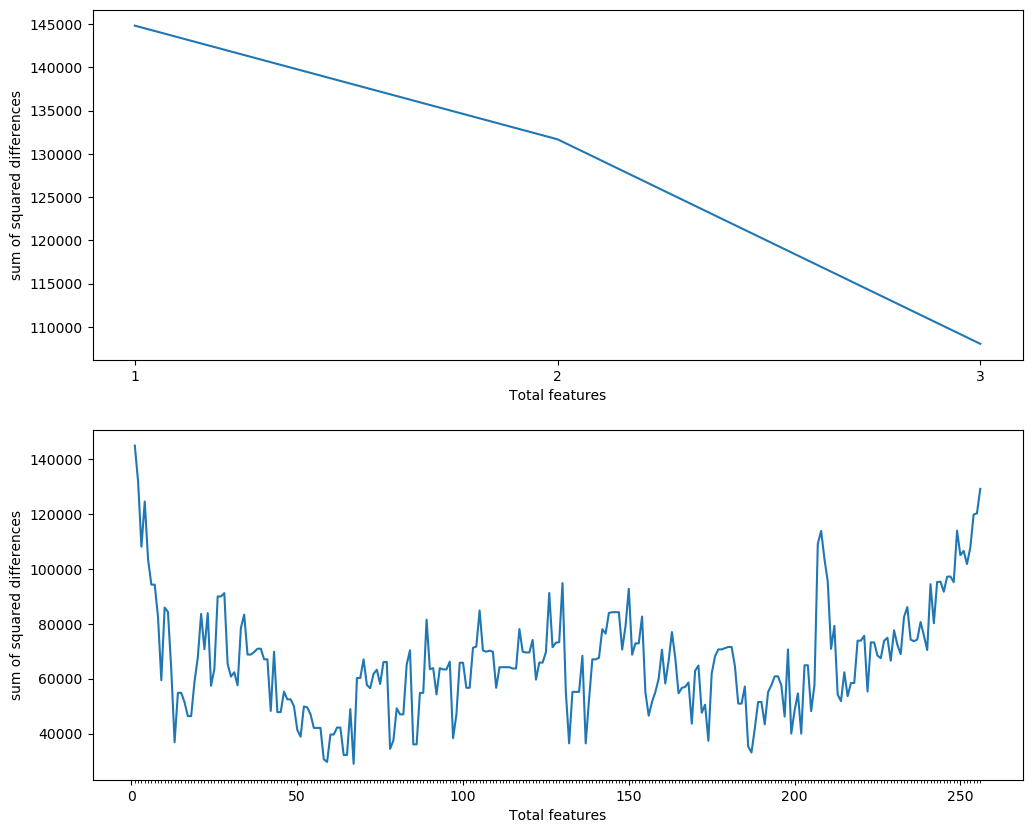

In [149]:
import matplotlib.pyplot as plt
SSD = feature_selection(x_train,x_test,angles_train,angles_test)
SSD_var, indices = feature_selection_variant(x_train,x_test,angles_train,angles_test)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))
x = np.arange(1, len(SSD) + 1, 1)
ax1.plot(x,SSD)
ax1.set_xticks(range(1,len(SSD)+1))
ax1.set_ylabel("sum of squared differences")
ax1.set_xlabel("Total features")

x2 = np.arange(1, len(SSD_var) + 1, 1)
ax2.plot(x2,SSD_var)
ax2.set_xticks(range(1,len(SSD_var)+1),10)
ax2.set_ylabel("sum of squared differences")
ax2.set_xlabel("Total features")

1A d) 

With this split in training data and test data, the later algorithm gets better results quite early in the iterations due to there being a small change in the beginning. At 4th feature summed ssd score rises which stops the first algorithm. We can see from graph 2 that 2nd algorithm gets quite stable good results at 100-150 features and then starts getting worse again. Keep in mind that the order of the samples in test and train data will vary if the program is run from the start again, hence the results will be different as well.

2A Variable ranking

1.

Pearsons correlation could be used as a simple ranking method in feature selection by showing what features may have correlation to the target variables. The features with high values could be chosen as the variables to be used in a model. However in this case, the correlation would assume that the variables are independent of each other, which might cause problems. Correlation can also only detect linear dependencies between vaariable and the target.

2.

In [150]:
def variable_ranking(x_train,x_test,angles_train,angles_test):
    import operator
    
    all_ssd = {}
    
    for i in range(X.shape[1]):
        
        indences = [i]
        new_x_train = x_train[:,indences]
        new_x_test = x_test[:,indences]
        
        new_ssd = ssd(k_nn(new_x_test, new_x_train, angles_train), angles_test)
        
        # adds a pair, index and the squared error sum to a list
        all_ssd[i]=new_ssd
    sorted_ssd = sorted(all_ssd.items(), key=operator.itemgetter(1))
    return sorted_ssd

In [151]:
ranking = variable_ranking(x_train,x_test,angles_train,angles_test)
for i in range(len(indices)):
    print(indices[i], ranking[i][0])


19 19
103 140
165 112
207 230
8 141
9 146
179 223
174 116
113 171
26 49
115 221
180 192
171 220
24 33
250 78
245 213
13 198
84 54
12 24
54 26
40 249
124 254
138 47
120 144
105 155
189 142
226 81
167 203
188 105
81 226
132 46
73 169
96 195
98 115
17 118
101 126
18 218
114 158
142 117
224 52
176 36
53 80
57 201
102 207
91 119
2 253
80 184
195 190
67 95
15 4
72 69
203 73
126 153
45 125
0 152
58 181
22 133
112 229
59 34
49 22
32 60
87 56
107 214
89 191
97 123
93 94
56 228
71 183
46 100
64 6
125 194
29 196
116 131
128 167
118 165
27 186
151 35
230 233
62 205
99 99
1 85
100 124
137 135
39 162
104 175
52 58
135 216
181 122
3 72
38 83
215 238
111 241
162 62
147 179
68 12
79 173
106 235
70 204
122 163
37 209
219 82
192 88
184 40
253 7
190 161
246 96
199 136
197 63
145 57
121 107
169 31
222 137
153 70
194 188
206 210
251 45
200 97
252 231
218 14
214 166
163 172
139 246
6 240
33 17
205 55
148 42
172 148
166 92
208 114
247 84
159 61
146 248
170 0
254 236
201 177
23 159
255 176
191 44
240 212
210 4

Basically the first number is the same, but after that, the list is completely different